<a href="https://colab.research.google.com/github/vishalrazdan29/data_playground/blob/main/LoanTapData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LoanTap**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

1. Personal Loan

2. EMI Free Loan

3. Personal Overdraft

4. Advance Salary Loan

## **Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

**Features**

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

term : The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.

grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title :The job title supplied by the Borrower when applying for the loan.*

emp_length : Employment length in years. Possible values are between 0 and 10 
where 0 means less than one year and 10 means ten or more years.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

annual_inc : The self-reported annual income provided by the borrower during registration.

verification_status : Indicates if income was verified by LoanTap, not 
verified, or if the income source was verified

issue_d : The month which the loan was funded

loan_status : Current status of the loan - Target Variable

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the 
borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual

# **Basis Analysis**

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer

In [3]:
!gdown 1J63tqYm9bczVnVeDWbg7YkDlo3Njd2CN 

Downloading...
From: https://drive.google.com/uc?id=1J63tqYm9bczVnVeDWbg7YkDlo3Njd2CN
To: /content/LoanTapData.csv
100% 100M/100M [00:00<00:00, 183MB/s] 


In [173]:
df_org=pd.read_csv("LoanTapData.csv")

In [5]:
df_org.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [181]:
df_org['pin_code']=df_org['address'].str[-5:]#.value_counts()

# **Descriptive Statistics**

In [7]:
df_org.shape

(396030, 28)

In [8]:
df_org.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
pin_code                 object
dtype: object

In [9]:
df_org.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [10]:
df_org['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [11]:
df_org.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'pin_code'],
      dtype='object')

# **Missing Value Analysis**

In [12]:
def missing_analysis(df_org):
  ma=pd.DataFrame((df_org.isna().sum()/len(df_org)).round(4)[df_org.isna().sum()!=0],columns={'Missing percentage'})
  ma['Missing Count']=df_org[ma.index].isna().sum()
  ma=ma.sort_values(by='Missing percentage',ascending=False)
  return ma

ma=missing_analysis(df_org)

In [13]:
ma

,Missing percentage,Missing Count
mort_acc,0.0954,37795
emp_title,0.0579,22927
emp_length,0.0462,18301
title,0.0044,1755
pub_rec_bankruptcies,0.0014,535
revol_util,0.0007,276


In [14]:
ma['Missing percentage'].sum()*100

20.599999999999998

If the missing data points are isolated, removal of missing data will result in loss of 20% data points. 

So we need to treat the missing data.

# **Missing Values treatment**

1. For mort_acc

trying LinearRegression Models to find out the values of mort_acc.

In [15]:
df_org.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pin_code
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650


In [16]:
indx=df_org[df_org['mort_acc'].isnull()].index
df_org.iloc[indx]['loan_amnt']

22         4200.0
25         6000.0
32         3000.0
41        28000.0
62         5000.0
           ...   
395991     5600.0
395995    10000.0
396016     3000.0
396021     3200.0
396029     2000.0
Name: loan_amnt, Length: 37795, dtype: float64

In [17]:
# (df_org.describe().columns.drop('mort_acc')]).head()
df_org.describe().columns.drop('mort_acc')

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
mis_col='mort_acc'
df_mt=df_org.copy()
cols=df_org.loc[:, df_org.dtypes != np.object_].columns
df_mt=df_mt[cols].round(1)
df_mt.dropna(inplace=True)
X=df_mt[df_mt.columns.drop(mis_col)].values
y=df_mt[mis_col].values
mort_acc_reg = LinearRegression().fit(X, y)

In [19]:
df_org.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'pin_code'],
      dtype='object')

In [20]:
test_set_df=df_org[df_org[mis_col].isnull()][df_org.loc[:, df_org.dtypes != np.object_].columns.drop(mis_col)]
test_set_df=test_set_df.dropna()
X_test=test_set_df.values
y_test=mort_acc_reg.predict(X_test)

In [21]:
y_test.round()

array([0., 0., 2., ..., 2., 3., 2.])

In [22]:
mort_acc_reg.score(X,y)

0.2434804864973471

In [23]:
clf = Ridge(alpha=0.1)
clf.fit(X, y)

Ridge(alpha=0.1)

In [24]:
clf.score(X, y)

0.243480486497338

Since the score is not satisfactory, we will use some other approach to handle missing value of mort_acc.

**Trying Custom Imputation Technique**

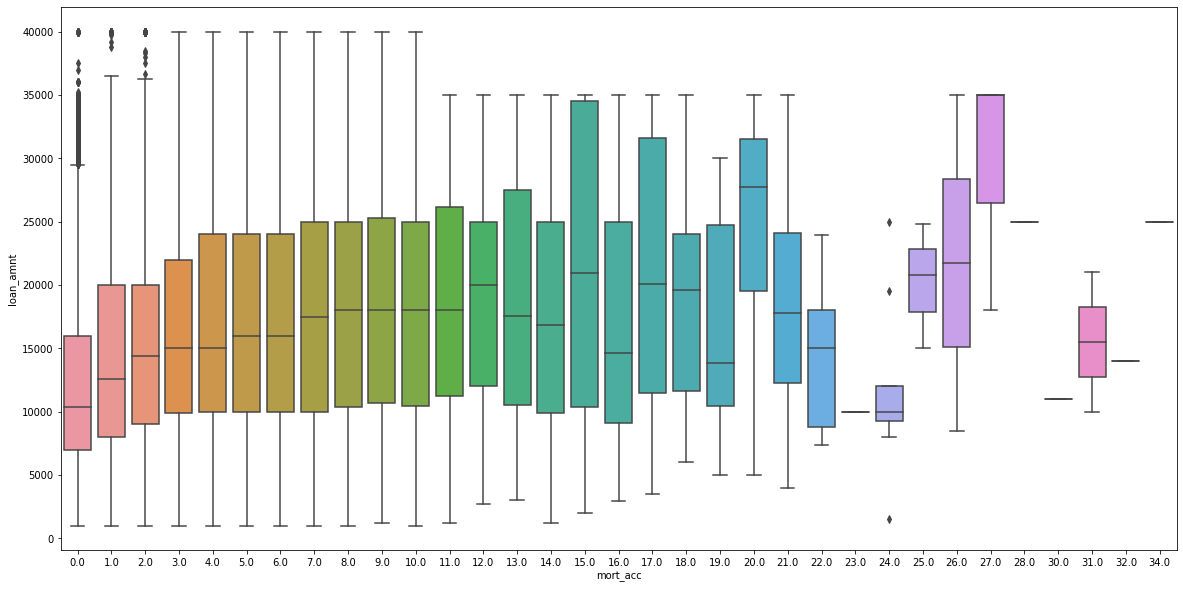

In [25]:
df_test=df_org.dropna()
plt.figure(figsize=(20,10))
sns.boxplot(x=df_test['mort_acc'],y=df_test['loan_amnt'])
# df_test

It can be seen that Loan Amount and Mort_acc has some relation:

So Custom Imputation can be used in this case:

if loan_amnt<10k:
   mort_acc=0

if loan_amnt>10k and loan_amnt<17k:
  mort_acc=10

if loan_amnt>17k and loan_amnt<25k:
  mort_acc=18

if loan_amnt>25k:
  mort_acc=26

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


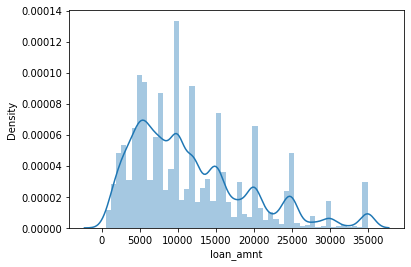

In [26]:
sns.distplot(df_org[df_org[mis_col].isnull()]['loan_amnt'])

In [27]:
def mort_impute(row):
  mort_acc=0
  if row['loan_amnt']<=10000:
    mort_acc=0
  elif row['loan_amnt']>10000 and row['loan_amnt']<=17000:
    mort_acc=10
  elif row['loan_amnt']>17000 and row['loan_amnt']<=25000:
    mort_acc=18
  elif row['loan_amnt']>25000:
    mort_acc=26
  return mort_acc

In [28]:
df_org.shape

(396030, 28)

In [29]:
df_org[df_org['mort_acc'].isnull()].shape

(37795, 28)

In [30]:
df_org.loc[(df_org['mort_acc'].isnull()) & (df_org['loan_amnt']<=10000),'mort_acc']=0
df_org.loc[(df_org['mort_acc'].isnull()) & ((df_org['loan_amnt']>10000) & (df_org['loan_amnt']<=17000)),'mort_acc']=10
df_org.loc[(df_org['mort_acc'].isnull()) & ((df_org['loan_amnt']>17000) & (df_org['loan_amnt']<=25000)),'mort_acc']=18
df_org.loc[(df_org['mort_acc'].isnull()) & (df_org['loan_amnt']>25000),'mort_acc']=26

In [31]:
df_org.loc[df_org['mort_acc'].isnull(),:]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pin_code


**KNN Imputation Using Floating features.**

In [32]:
X=df_org.drop('mort_acc',axis=1)
X=X.loc[:,X.select_dtypes(include=['float64']).columns]
imputer = KNNImputer(n_neighbors=5)
X_=imputer.fit_transform(X)
X_df = pd.DataFrame(X_, columns = X.select_dtypes(include=['float64']).columns)
X_df

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,0.0


In [33]:
X_df.isnull().sum()

loan_amnt               0
int_rate                0
installment             0
annual_inc              0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

**2. Treatment for Missing emp_title**

Randomly assigning values from existing set.

In [34]:
ls=list(df_org['emp_title'].value_counts().index)
import random
 
n = 22927
 
title_ls=random.sample(ls, n)

In [35]:
df_org['emp_title'].value_counts().shape

(173105,)

173105 unique values of emp_title.emp_title is non-ordinal categorical feature.

In [36]:
df_org.loc[df_org['emp_title'].isnull(),'emp_title']=title_ls

In [37]:
df_org['emp_title'].isnull().sum()

0

**3. Treatment for emp_length feature**

Mode Imputation

In [38]:
df_org['emp_length'].mode(0)[0]

'10+ years'

In [39]:
df_org.loc[df_org['emp_length'].isnull(),'emp_length']=df_org['emp_length'].mode(0)[0]

In [40]:
df_org['emp_length'].isnull().sum()

0

In [41]:
df_org.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
pin_code                   0
dtype: int64

Missing Value treatment for title

In [42]:
df_org.loc[df_org['title'].isnull(),'title']='NA'

Missing Value treatment for revol_util

In [43]:
df_org['revol_util'].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [44]:
df_org['revol_util'].mean()

53.79174863677942

In [45]:
df_org.loc[df_org['revol_util'].isnull(),'revol_util']=df_org['revol_util'].mean()

Missing Value treatment for pub_rec_bankruptcies

In [46]:
df_org['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [47]:
df_org['pub_rec_bankruptcies'].isnull().sum()

535

Since the count of null records for pub_rec_bankruptcies is negligible.These null records can be dropped.

In [48]:
# df_org['pub_rec_bankruptcies'].dropna()
df_org = df_org[df_org['pub_rec_bankruptcies'].notna()]

In [49]:
df_org.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
pin_code                0
dtype: int64

# **Data Preprocessing**

In [50]:
#Converting term to numeric feature for analysis
df_org['term']=df_org['term'].str.split(" ").str[1]
df_org[["term"]] = df_org[["term"]].apply(pd.to_numeric)

In [51]:
df_org['term'].value_counts()

36    301470
60     94025
Name: term, dtype: int64

Since the "Address" feature can not be used for determining "whether the credit line should be extended or not."

So "Address" feature can be dropped from the dataset.

In [52]:
df_org.drop('address',axis=1,inplace=True)

In [53]:
df_org.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pin_code
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


In [54]:
df_org['emp_length'].value_counts()

10+ years    144252
2 years       35764
3 years       31616
< 1 year      31595
5 years       26471
1 year        25807
4 years       23919
6 years       20818
7 years       20803
8 years       19149
9 years       15301
Name: emp_length, dtype: int64

Hence Emp_length feature is a categorical feature. One hot encoding can be used here in this case. 

In [55]:
df_org['home_ownership'].value_counts()

MORTGAGE    198151
RENT        159508
OWN          37692
OTHER          112
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [56]:
df_org['initial_list_status'].value_counts()

f    237531
w    157964
Name: initial_list_status, dtype: int64

In [57]:
df_org['application_type'].value_counts()

INDIVIDUAL    394784
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [58]:
df_org['home_ownership'].value_counts()

MORTGAGE    198151
RENT        159508
OWN          37692
OTHER          112
NONE            29
ANY              3
Name: home_ownership, dtype: int64

# **Data Visualisation**

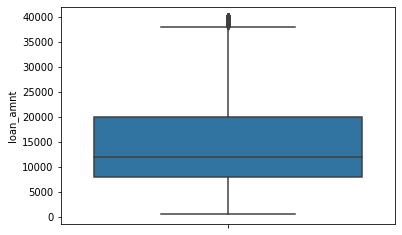

In [59]:
sns.boxplot(y=df_org['loan_amnt'])

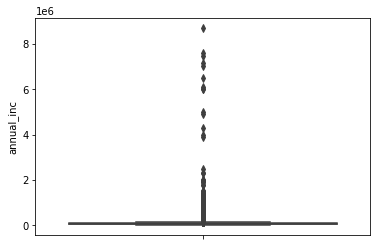

In [60]:
sns.boxplot(y=df_org['annual_inc'])

Outliers Detection

In [61]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    # global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    # filtered_data = data.loc[data[col].isin(outlier_free_list)]



In [62]:
for i in df_org.columns:
    if i == df_org.columns[0]:
      removeOutliers(df_org, i)
    # else:
    #   removeOutliers(filtered_data, i)

IQR value for column loan_amnt is: 12000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


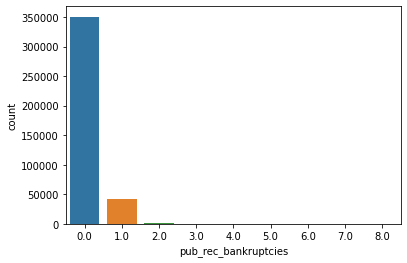

In [63]:
sns.countplot(df_org['pub_rec_bankruptcies'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


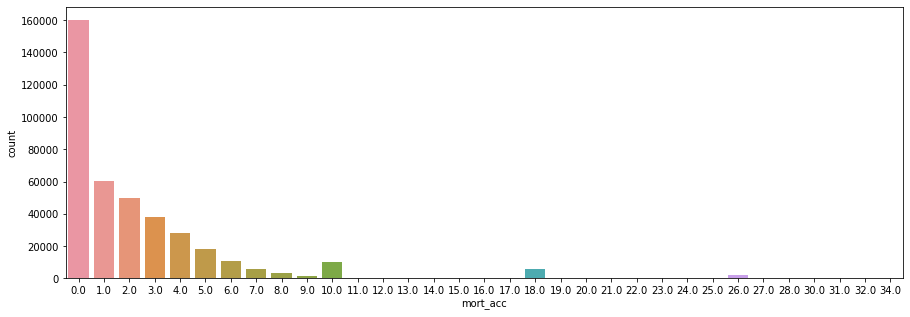

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(df_org['mort_acc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


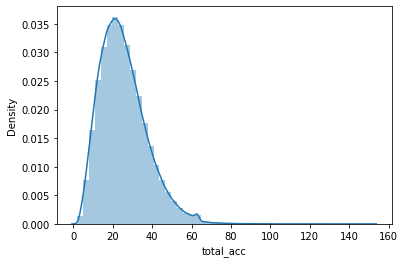

In [65]:
sns.distplot(df_org['total_acc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


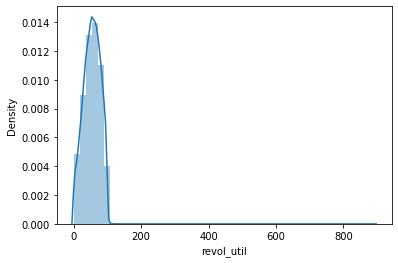

In [66]:
sns.distplot(df_org['revol_util'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


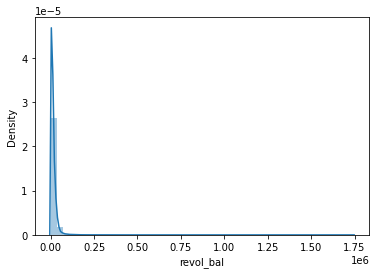

In [67]:
sns.distplot(df_org['revol_bal'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


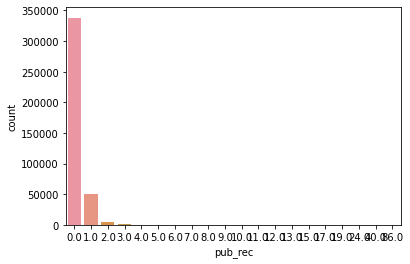

In [68]:
sns.countplot(df_org['pub_rec'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


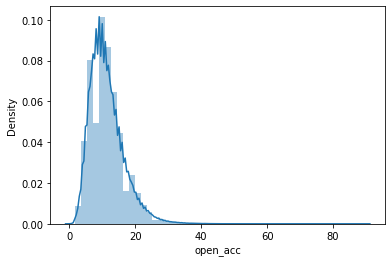

In [69]:
sns.distplot(df_org['open_acc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


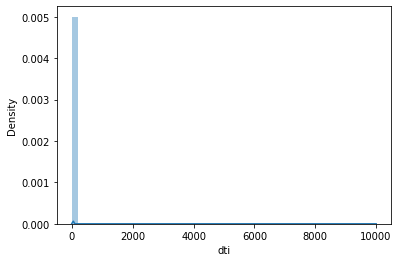

In [70]:
sns.distplot(df_org['dti'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


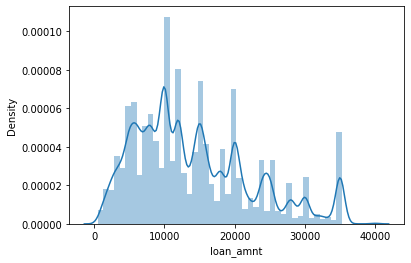

In [71]:
sns.distplot(df_org['loan_amnt'])

In [72]:
df_org.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36,36,36,36,60
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


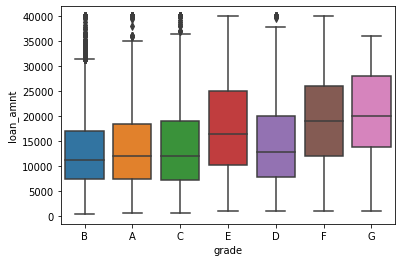

In [73]:
sns.boxplot(data=df_org, x="grade", y="loan_amnt")

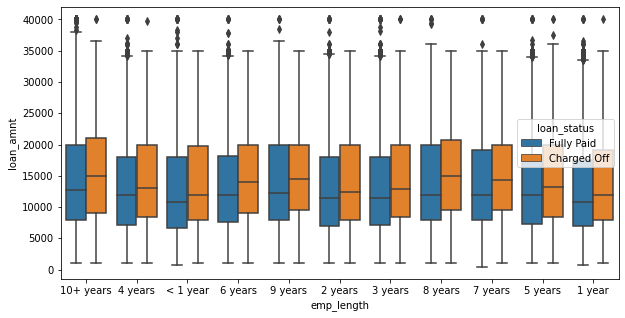

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_org, x="emp_length", y="loan_amnt",hue="loan_status")

Nearly same loan amount for people across experience.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


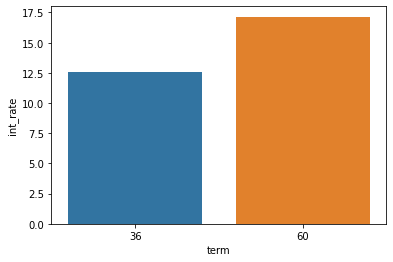

In [75]:
sns.barplot(df_org['term'],df_org['int_rate'])

**Observation**: Less term means Lesser intrest rates.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


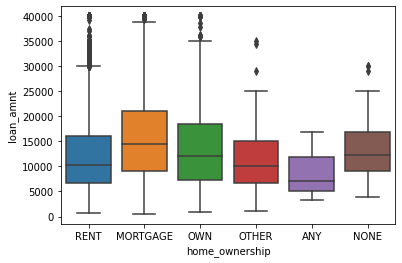

In [76]:
sns.boxplot(df_org['home_ownership'],df_org['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


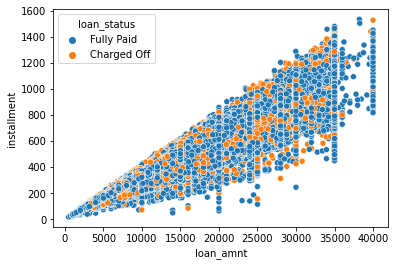

In [77]:
sns.scatterplot(df_org['loan_amnt'],df_org['installment'],hue=df_org['loan_status'])

In [78]:
df_org['loan_status'].value_counts()

Fully Paid     317909
Charged Off     77586
Name: loan_status, dtype: int64

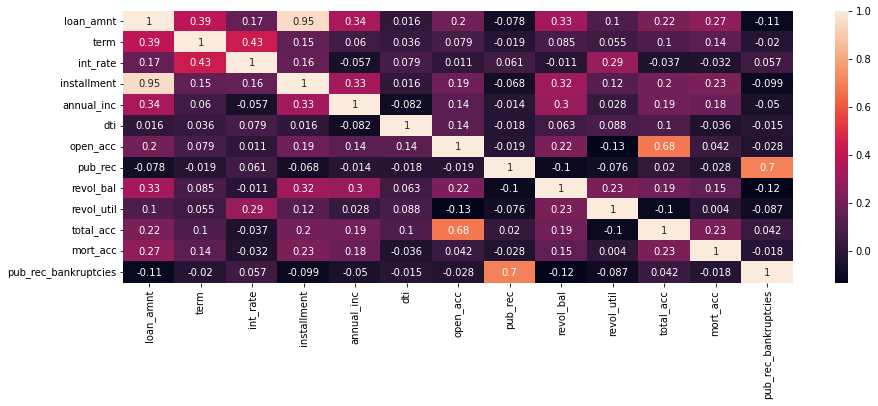

In [79]:
plt.figure(figsize=(15,5))
sns.heatmap(df_org.corr(),annot=True)

1. Installement is collinear with Loan amount feature.

2. Open acc and total_acc are collinear.

3. Public record is collinear with pub_rec_bankruptcies.

In [80]:
df_org.loc[df_org['pub_rec']>1,'pub_rec_flag']=1
df_org.loc[df_org['pub_rec']<=1,'pub_rec_flag']=0


In [81]:
df_org.loc[df_org['mort_acc']>1,'mort_acc_flag']=1
df_org.loc[df_org['mort_acc']<=1,'mort_acc_flag']=0

In [82]:
df_org.loc[df_org['pub_rec_bankruptcies']>1,'pub_rec_bankruptcies_flag']=1
df_org.loc[df_org['pub_rec_bankruptcies']<=1,'pub_rec_bankruptcies_flag']=0

In [83]:
df_org.drop(columns=['pub_rec_bankruptcies','mort_acc','pub_rec'],inplace=True)

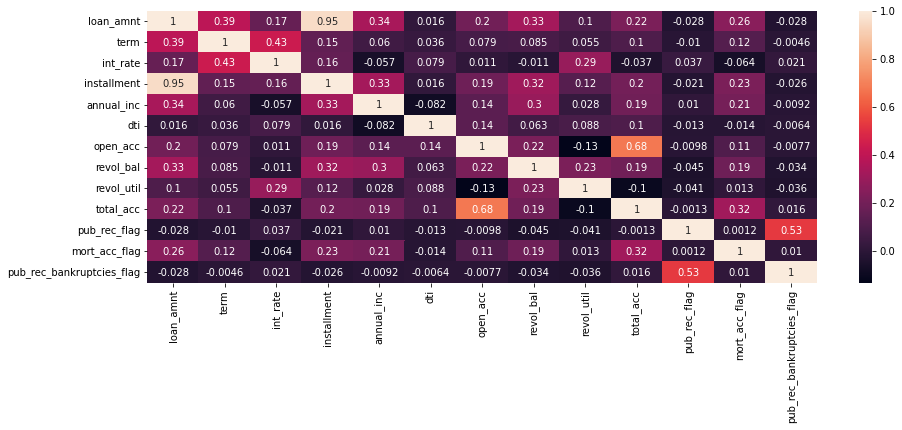

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(df_org.corr(),annot=True)

Total Account and Open_acc are collinear.So one of the two can be dropped from the dataset.

In [85]:
df_org.drop(columns=['open_acc'],inplace=True)

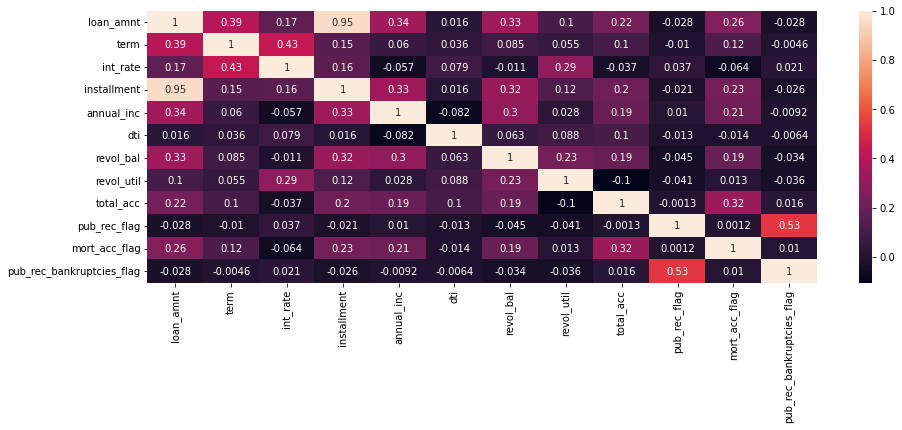

In [86]:
plt.figure(figsize=(15,5))
sns.heatmap(df_org.corr(),annot=True)

In [87]:
df_org.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pin_code', 'pub_rec_flag',
       'mort_acc_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')

In [88]:
df_org['verification_status'].value_counts()

Verified           139562
Source Verified    131385
Not Verified       124548
Name: verification_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


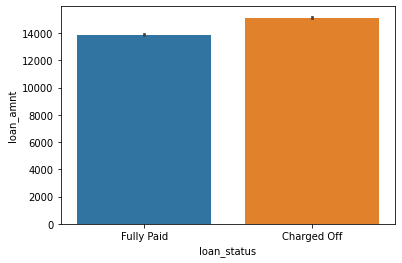

In [89]:
sns.barplot(df_org['loan_status'],df_org['loan_amnt'])

Since Installement and Loan_amnount are collinear.Hence one of these features can be dropped from the dataset.

In [90]:
df_org.drop(columns=['installment'],inplace=True)

In [91]:
df_org.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,revol_bal,revol_util,total_acc,initial_list_status,application_type,pin_code,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,Jun-1990,36369.0,41.8,25.0,w,INDIVIDUAL,22690,0.0,0.0,0.0
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,Jul-2004,20131.0,53.3,27.0,f,INDIVIDUAL,05113,0.0,1.0,0.0
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,Aug-2007,11987.0,92.2,26.0,f,INDIVIDUAL,05113,0.0,0.0,0.0
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,Sep-2006,5472.0,21.5,13.0,f,INDIVIDUAL,00813,0.0,0.0,0.0
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,Mar-1999,24584.0,69.8,43.0,f,INDIVIDUAL,11650,0.0,0.0,0.0


In [92]:
df_org.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'pin_code', 'pub_rec_flag', 'mort_acc_flag',
       'pub_rec_bankruptcies_flag'],
      dtype='object')

In [93]:
df_org['loan_status'].value_counts()

Fully Paid     317909
Charged Off     77586
Name: loan_status, dtype: int64

# **Target Feature Transformation and Encoding**

In [186]:
df_org.loc[df_org['loan_status']=='Fully Paid','paid']=1
df_org.loc[df_org['loan_status']=='Charged Off','paid']=0
# df_org.loc[df_org['loan_status']=='Fully Paid','not_paid']=0
# df_org.loc[df_org['loan_status']=='Charged Off','not_paid']=1

In [187]:
df_org.drop('loan_status',axis=1,inplace=True)

In [188]:
df_org.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


# **Data Prepration for modelling**

**earliest_cr_line Feature Engineering**

In [97]:
# (df_org['earliest_cr_line'].str.split('-', expand = True)[1])
df_org['earliest_cr_line']=pd.to_datetime(df_org['earliest_cr_line'].str.split('-', expand = True)[1]  + df_org['earliest_cr_line'].str.split('-', expand = True)[0], format='%Y%b')

In [98]:
df_org.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36,36,36,36,60
int_rate,11.44,11.99,10.49,6.49,17.27
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified


In [99]:
df_org['earliest_cr_line_date']=(pd.to_datetime('today')-df_org['earliest_cr_line'])

In [100]:
df_org['earliest_cr_line_date']=df_org['earliest_cr_line_date'].dt.days

In [101]:
df_org.dtypes

loan_amnt                           float64
term                                  int64
int_rate                            float64
grade                                object
sub_grade                            object
emp_title                            object
emp_length                           object
home_ownership                       object
annual_inc                          float64
verification_status                  object
issue_d                              object
purpose                              object
title                                object
dti                                 float64
earliest_cr_line             datetime64[ns]
revol_bal                           float64
revol_util                          float64
total_acc                           float64
initial_list_status                  object
application_type                     object
pin_code                             object
pub_rec_flag                        float64
mort_acc_flag                   

In [102]:
df_org.drop(columns=['earliest_cr_line'],inplace=True)

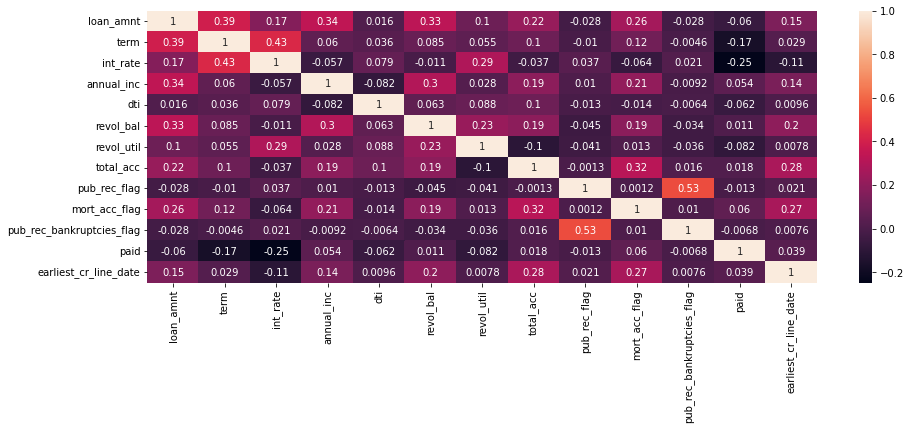

In [103]:
plt.figure(figsize=(15,5))
sns.heatmap(df_org.corr(),annot=True)

In [104]:
df_org.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'title', 'dti', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'pin_code',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'paid',
       'earliest_cr_line_date'],
      dtype='object')

In [105]:
df_org.dtypes=='object'

loan_amnt                    False
term                         False
int_rate                     False
grade                         True
sub_grade                     True
emp_title                     True
emp_length                    True
home_ownership                True
annual_inc                   False
verification_status           True
issue_d                       True
purpose                       True
title                         True
dti                          False
revol_bal                    False
revol_util                   False
total_acc                    False
initial_list_status           True
application_type              True
pin_code                      True
pub_rec_flag                 False
mort_acc_flag                False
pub_rec_bankruptcies_flag    False
paid                         False
earliest_cr_line_date        False
dtype: bool

In [106]:
df_org['application_type'].value_counts()

INDIVIDUAL    394784
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [107]:
one_hot = pd.get_dummies(df_org['application_type'])

In [108]:
df_org = pd.concat([df_org, one_hot], axis=1)
df_org.drop(columns=['application_type'],inplace=True)
df_org.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,initial_list_status,pin_code,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,paid,earliest_cr_line_date,DIRECT_PAY,INDIVIDUAL,JOINT
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,w,22690,0.0,0.0,0.0,1.0,11860,0,1,0
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,f,05113,0.0,1.0,0.0,1.0,6716,0,1,0
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,f,05113,0.0,0.0,0.0,1.0,5590,0,1,0
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,f,00813,0.0,0.0,0.0,1.0,5924,0,1,0
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,f,11650,0.0,0.0,0.0,0.0,8665,0,1,0


In [109]:
df_org['initial_list_status'].value_counts()

f    237531
w    157964
Name: initial_list_status, dtype: int64

In [110]:
one_hot = pd.get_dummies(df_org['initial_list_status'])
df_org = pd.concat([df_org, one_hot], axis=1)
df_org.drop(columns=['initial_list_status'],inplace=True)
df_org.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,paid,earliest_cr_line_date,DIRECT_PAY,INDIVIDUAL,JOINT,f,w
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,0.0,0.0,0.0,1.0,11860,0,1,0,0,1
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,1.0,0.0,1.0,6716,0,1,0,1,0
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,0.0,0.0,0.0,1.0,5590,0,1,0,1,0
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,0.0,0.0,0.0,1.0,5924,0,1,0,1,0
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,0.0,0.0,0.0,0.0,8665,0,1,0,1,0


The loan title provided by the borrower cannot determine the loan payment.Hence dropping loan title

In [111]:
df_org.drop(columns=['title'],inplace=True)

In [112]:
df_org['purpose'].value_counts()

debt_consolidation    234292
credit_card            82943
home_improvement       23994
other                  21098
major_purchase          8777
small_business          5660
car                     4680
medical                 4188
moving                  2846
vacation                2447
house                   2197
wedding                 1796
renewable_energy         329
educational              248
Name: purpose, dtype: int64

In [113]:
one_hot = pd.get_dummies(df_org['purpose'])
df_org = pd.concat([df_org, one_hot], axis=1)
df_org.drop(columns=['purpose'],inplace=True)
df_org.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,0,0,0,0,0,0,0,0,0,0


Month of load funded is also not helpful in determining the target feature, hence dropping issue_d.

In [114]:
df_org.drop(columns=['issue_d'],inplace=True)

In [115]:
df_org['verification_status'].value_counts()

Verified           139562
Source Verified    131385
Not Verified       124548
Name: verification_status, dtype: int64

In [116]:
one_hot = pd.get_dummies(df_org['verification_status'])
df_org = pd.concat([df_org, one_hot], axis=1)
df_org.drop(columns=['verification_status'],inplace=True)

In [117]:
df_org['home_ownership'].value_counts()

MORTGAGE    198151
RENT        159508
OWN          37692
OTHER          112
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [118]:
one_hot = pd.get_dummies(df_org['home_ownership'])
df_org = pd.concat([df_org, one_hot], axis=1)
df_org.drop(columns=['home_ownership'],inplace=True)

In [119]:
df_org['emp_length'].value_counts()

10+ years    144252
2 years       35764
3 years       31616
< 1 year      31595
5 years       26471
1 year        25807
4 years       23919
6 years       20818
7 years       20803
8 years       19149
9 years       15301
Name: emp_length, dtype: int64

**Target Encoding for emp_length feature**

In [120]:
# df_org['emp_length']=(ce.TargetEncoder().fit_transform(df_org['emp_length'],df_org['not_paid']))['emp_length']
df_org['emp_length']=(ce.TargetEncoder().fit_transform(df_org['emp_length'],df_org['paid']))['emp_length']

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


**Target Encoding for emp_title feature**

In [121]:
df_org['emp_title'].value_counts()

Teacher                 4389
Manager                 4251
Registered Nurse        1856
RN                      1846
Supervisor              1830
                        ... 
Ron McGovern               1
Dataconcepts LLC           1
Centerline Digital         1
Sou-Chef                   1
Gracon Services, Inc       1
Name: emp_title, Length: 172810, dtype: int64

In [123]:
# df_org['emp_title']=(ce.TargetEncoder().fit_transform(df_org['emp_title'],df_org['not_paid']))['emp_title']
df_org['emp_title']=(ce.TargetEncoder().fit_transform(df_org['emp_title'],df_org['paid']))['emp_title']

**OHE for grade feature**

In [124]:
df_org['grade'].value_counts()

B    115857
C    105855
A     64071
D     63440
E     31462
F     11758
G      3052
Name: grade, dtype: int64

In [125]:
one_hot = pd.get_dummies(df_org['grade'])
df_org = pd.concat([df_org, one_hot], axis=1)
df_org.drop(columns=['grade'],inplace=True)

**Target Encoding for sub_grade**

In [126]:
df_org['sub_grade'].value_counts()

B3    26623
B4    25574
C1    23623
C2    22559
B2    22464
B5    22051
C3    21192
C4    20255
B1    19145
A5    18502
C5    18226
D1    15971
A4    15769
D2    13934
D3    12207
D4    11638
A3    10540
A1     9719
D5     9690
A2     9541
E1     7910
E2     7423
E3     6204
E4     5356
E5     4569
F1     3533
F2     2761
F3     2283
F4     1785
F5     1396
G1     1057
G2      754
G3      552
G4      374
G5      315
Name: sub_grade, dtype: int64

In [128]:
# df_org['sub_grade']=(ce.TargetEncoder().fit_transform(df_org['sub_grade'],df_org['not_paid']))['sub_grade']
df_org['sub_grade']=(ce.TargetEncoder().fit_transform(df_org['sub_grade'],df_org['paid']))['sub_grade']

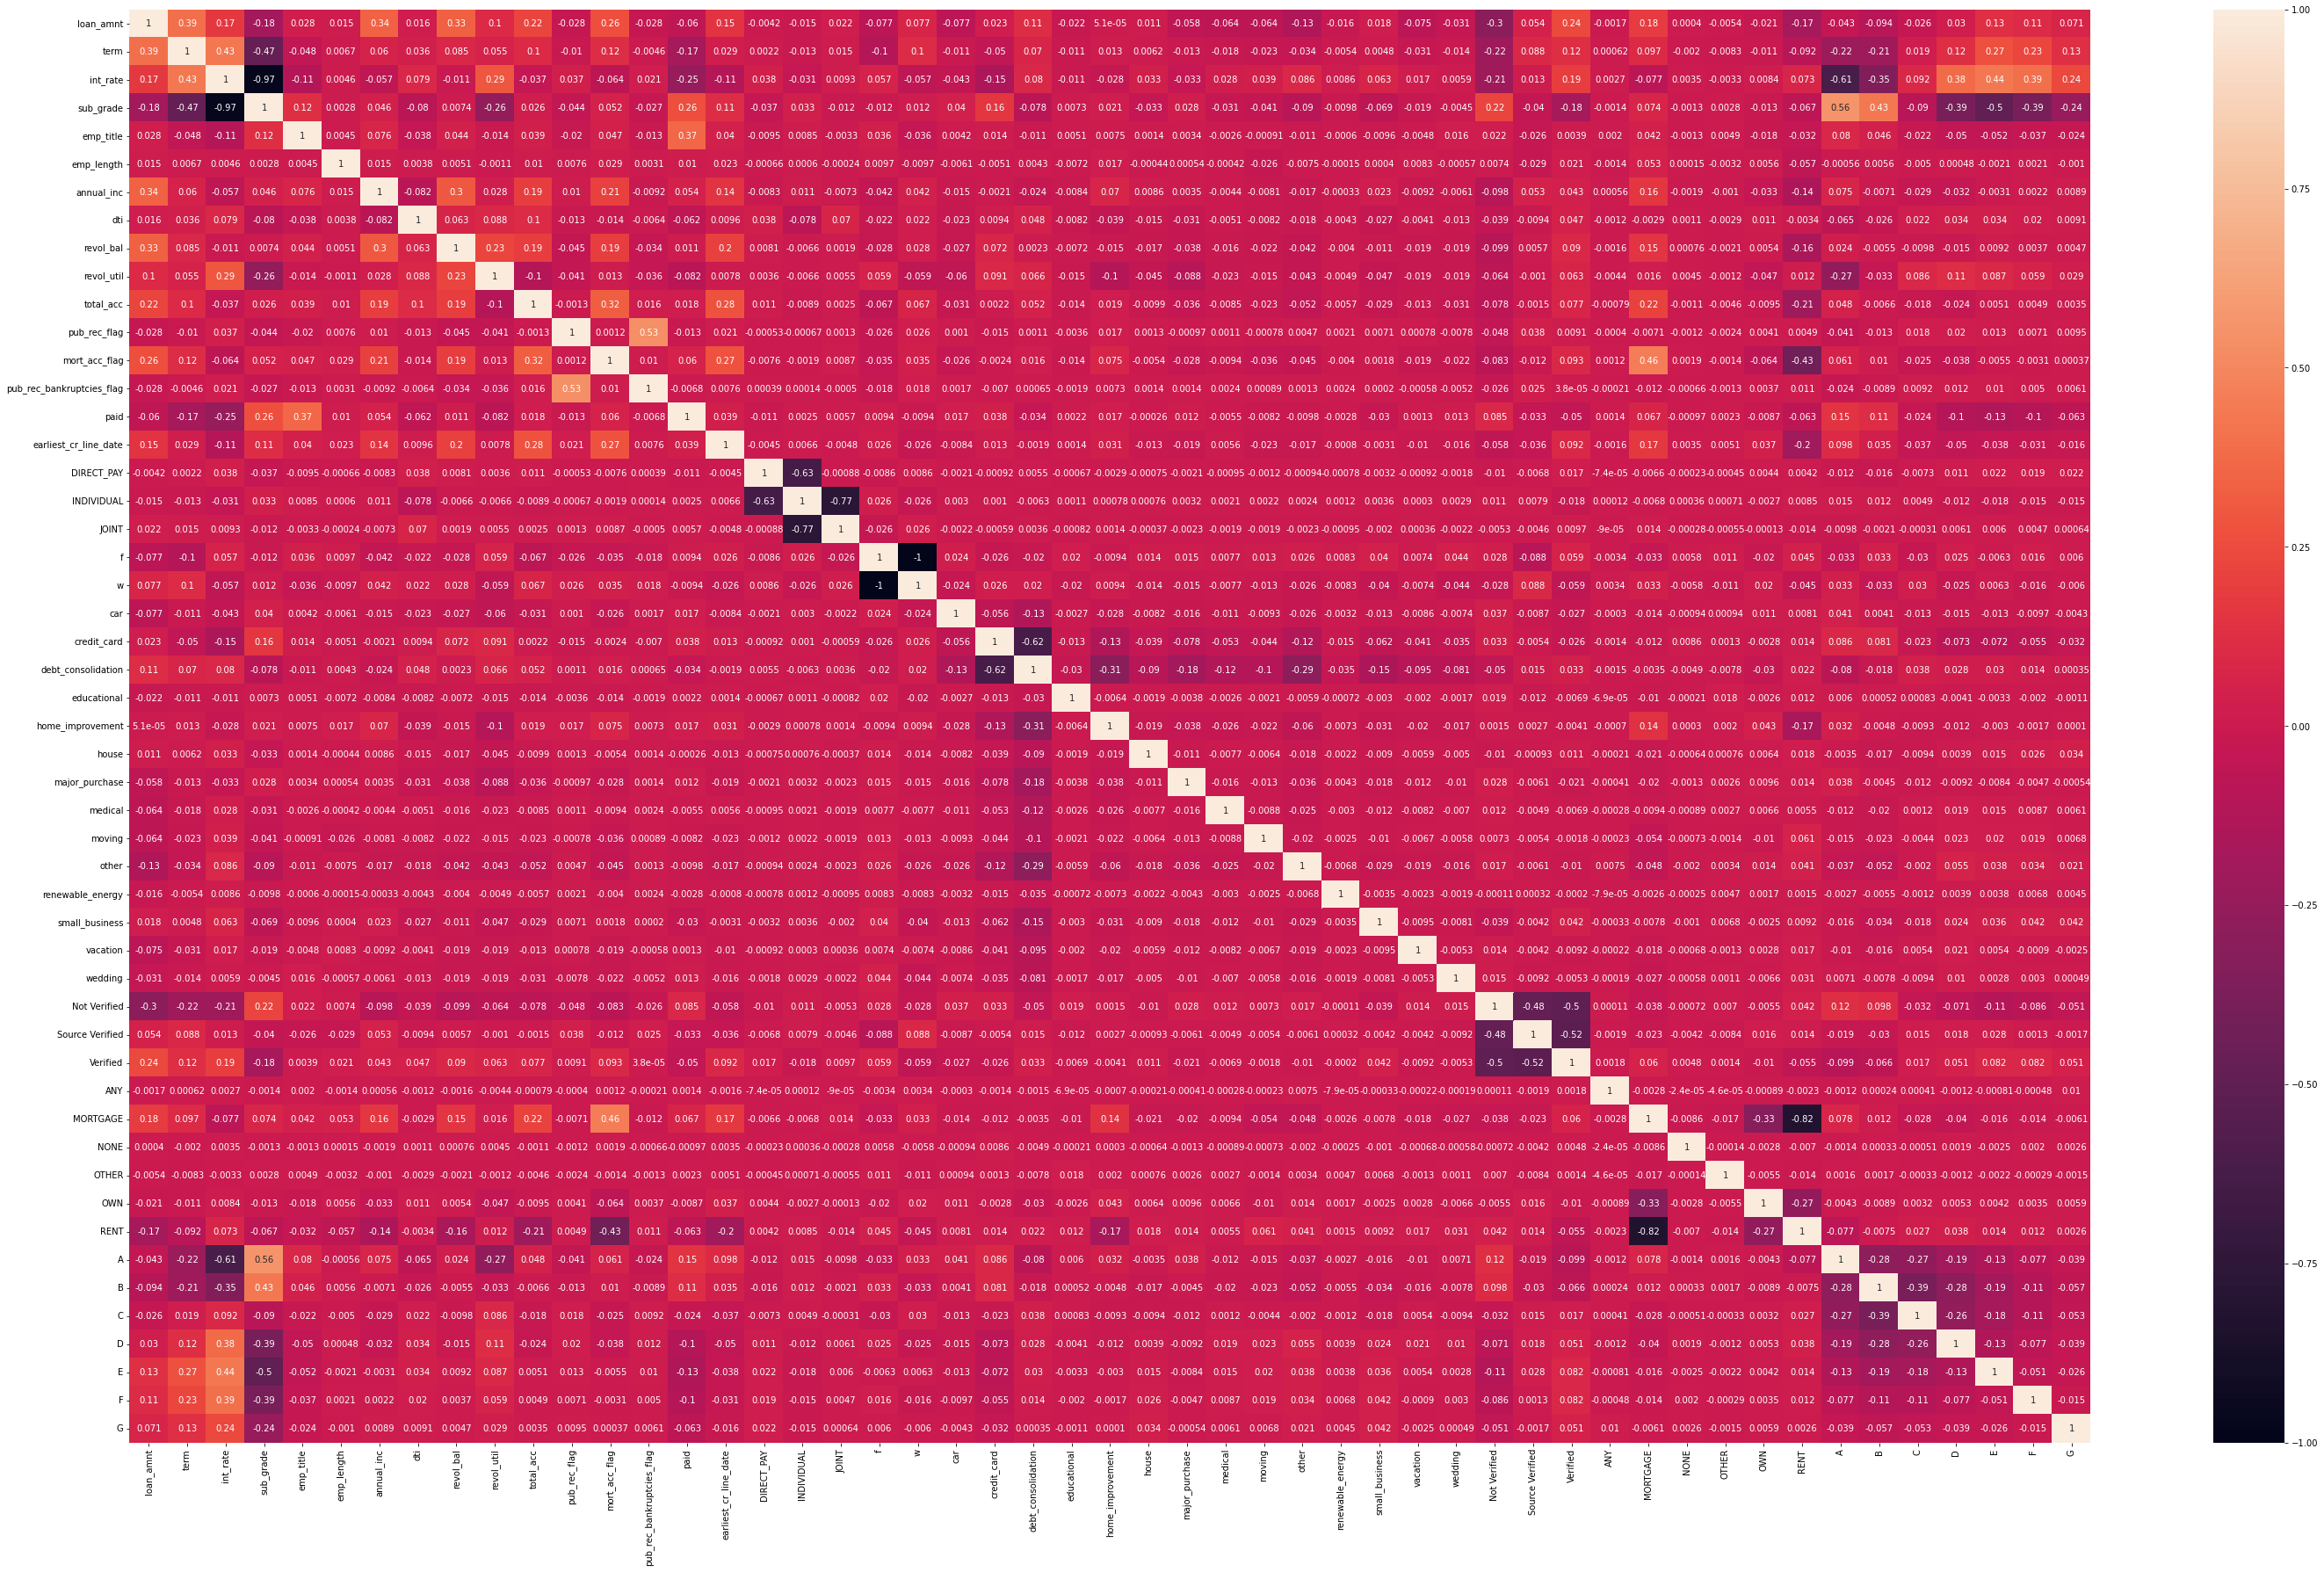

In [129]:
plt.figure(figsize=(50,30))
sns.heatmap(df_org.corr(),annot=True)

# **Data Split in test and train**

In [130]:
X=df_org.drop(columns=['paid'])
y=df_org['paid']
# X=df_org.drop(columns=['not_paid'])
# y=df_org['not_paid']
X_train, X_test, y_train, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train.shape,X_test.shape,y_train.shape,y_test_1.shape,

((316396, 51), (79099, 51), (316396,), (79099,))

# **Standardisation**

In [132]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'pin_code',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag',
       'earliest_cr_line_date', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w',
       'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Not Verified', 'Source Verified', 'Verified', 'ANY', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

In [133]:
X_train.shape,y_train.shape

((316396, 51), (316396,))

In [134]:
X_train.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,annual_inc,dti,revol_bal,revol_util,...,OTHER,OWN,RENT,A,B,C,D,E,F,G
46416,4200.0,36,19.72,0.679876,0.803826,0.804259,61120.0,3.16,4652.0,52.3,...,0,0,0,0,0,0,1,0,0,0
130063,12000.0,60,9.99,0.876610,0.803826,0.804561,52500.0,24.94,21092.0,44.3,...,0,0,0,0,1,0,0,0,0,0
339335,30000.0,60,17.57,0.688692,0.794691,0.793005,90000.0,14.88,25719.0,60.1,...,0,0,0,0,0,0,1,0,0,0
195597,16000.0,60,15.61,0.736084,0.784392,0.804259,55000.0,24.94,10629.0,23.9,...,0,0,1,0,0,0,1,0,0,0
194908,10000.0,36,15.80,0.781427,0.803826,0.804259,40000.0,17.79,8606.0,92.5,...,0,0,0,0,0,1,0,0,0,0


In [135]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [136]:
scaler.mean_.round()

array([1.4122e+04, 4.2000e+01, 1.4000e+01, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 7.4191e+04, 1.7000e+01, 1.5820e+04, 5.4000e+01,
       2.5000e+01, 3.3973e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       8.9620e+03, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00])

In [137]:
X_train=scaler.transform(X_train)

In [138]:
# df = pd.DataFrame(X_train, columns = Xtrain.columns)

In [139]:
X_train

array([[-1.18815367, -0.55840153,  1.36053819, ..., -0.29453123,
        -0.17442653, -0.0875733 ],
       [-0.25414756,  1.79082605, -0.81697525, ..., -0.29453123,
        -0.17442653, -0.0875733 ],
       [ 1.90125115,  1.79082605,  0.87938157, ..., -0.29453123,
        -0.17442653, -0.0875733 ],
       ...,
       [-0.95165853, -0.55840153,  1.03156134, ..., -0.29453123,
        -0.17442653, -0.0875733 ],
       [ 0.46431868,  1.79082605,  0.44074577, ..., -0.29453123,
        -0.17442653, -0.0875733 ],
       [-0.54153405, -0.55840153, -0.43204996, ..., -0.29453123,
        -0.17442653, -0.0875733 ]])

# **Logistic Regression**

In [140]:
clf = LogisticRegression(random_state=42,C=0.09).fit(X_train, y_train)

In [141]:
# test_scores=[]
# train_scores=[]
# for i in np.arange(0.1,0.99,0.01):
#   clf = LogisticRegression(random_state=39,C=i).fit(X_train, y_train)
#   trs=clf.score(X_train, y_train)
#   tes=clf.score(X_test, y_test)
#   test_scores.append(tes)
#   train_scores.append(trs)

In [142]:
test=scaler.transform(X_test)
y_pred_1=clf.predict(test)

In [213]:
test.shape

(79099, 51)

In [214]:
y_pred_prob_1=clf.predict_proba(test)

In [143]:
clf.score(X_train, y_train)

0.8536801982325946

In [144]:
clf.score(test, y_test_1)

0.8531586998571411

Since the accuracy score is immune to imbalanced data.

**Hence we will use some different classification metrics to analyse the model.**

In [145]:
X_test.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'pin_code',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag',
       'earliest_cr_line_date', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w',
       'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Not Verified', 'Source Verified', 'Verified', 'ANY', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

In [146]:
clf.intercept_

array([1.98563922])

In [147]:
clf.coef_.round(2).ravel()

array([-0.1 , -0.18,  0.25,  0.72,  0.93,  0.02,  0.07, -0.21,  0.03,
       -0.08,  0.01, -0.86, -0.01,  0.09,  0.01, -0.01, -0.  , -0.02,
        0.03, -0.02,  0.02,  0.02,  0.02,  0.  , -0.  , -0.01,  0.01,
       -0.  , -0.01, -0.01, -0.  , -0.01, -0.04,  0.01,  0.03,  0.03,
       -0.02, -0.  ,  0.02,  0.06, -0.  ,  0.  ,  0.  , -0.07,  0.09,
       -0.04, -0.05, -0.03,  0.03,  0.03,  0.02])

In [168]:
# X_train.columns.shape,clf.coef_.shape

In [149]:
results_df=pd.DataFrame({'Feature':X_test.columns,'Importance':clf.coef_.round(2).ravel()})
results_df.sort_values(by='Importance',ascending=False)

,Feature,Importance
4,emp_title,0.93
3,sub_grade,0.72
2,int_rate,0.25
13,mort_acc_flag,0.09
44,A,0.09
6,annual_inc,0.07
39,MORTGAGE,0.06
48,E,0.03
34,wedding,0.03
18,JOINT,0.03


After checking the feature importances,we can remove a few features which are not contributing much to the target varaible.

In [151]:
# X=df_org.drop(columns=['not_paid'])
# y=df_org['not_paid']
X=df_org.drop(columns=['paid'])
y=df_org['paid']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
X_test_2.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'pin_code',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag',
       'earliest_cr_line_date', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w',
       'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Not Verified', 'Source Verified', 'Verified', 'ANY', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

In [153]:
X_train_2=X_train_2.drop(columns=['earliest_cr_line_date', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT', 'f', 'w', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'Not Verified',
       'Source Verified', 'Verified', 'ANY', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G','loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'revol_bal', 'revol_util', 'total_acc','dti','pub_rec_flag','mort_acc_flag','pub_rec_bankruptcies_flag'],axis=1)

In [154]:
X_train_2.columns

Index(['sub_grade', 'emp_title', 'pin_code'], dtype='object')

In [155]:
X_test_2=X_test_2.drop(columns=['earliest_cr_line_date', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT', 'f', 'w', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'Not Verified',
       'Source Verified', 'Verified', 'ANY', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E', 'F', 'G','loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'revol_bal', 'revol_util', 'total_acc','dti','pub_rec_flag','mort_acc_flag','pub_rec_bankruptcies_flag'],axis=1)

In [156]:
X_train_2.shape,X_test_2.shape,y_train_2.shape,y_test_2.shape

((316396, 3), (79099, 3), (316396,), (79099,))

In [157]:
# removing loan_amnt feature for improving score
scaler2 = StandardScaler()
scaler2.fit(X_train_2)
train_2=scaler2.transform(X_train_2)
clf2 = LogisticRegression(random_state=42,C=0.5).fit(train_2,y_train_2)
# y_pred_2=clf.predict(X_test_2)

In [158]:
test_2=scaler2.transform(X_test_2)
# y_pred_2=clf.predict(test_2)

In [159]:
y_pred_2=clf2.predict(test_2)

In [160]:
clf2.score(X_test_2, y_test_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.1954639123124186

In [161]:
clf2.score(X_train_2, y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.19635203984879707

# **Classification Metrics**

In [162]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score

In [163]:
cm1=confusion_matrix(y_test_1,y_pred_1)

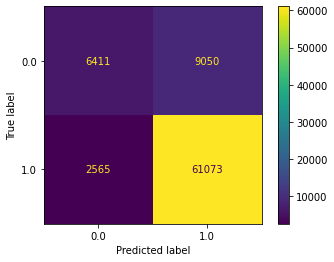

In [164]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf.classes_)
disp.plot()

**Confusion Matrix Intrepretation**

**False Positive**: Loan Actually Not Paid but model predicted paid.

**False Negative**: Loan Actually Paid but model predicted not paid.

False positives will lead to NPA's for the Bank. 

**Thus, Precision is of the prime importance for the BANK.**

Although compromising on the value of False Negative will lead to loss of customer satisfaction.

**Precision**

In [165]:
# Precision=Actual Positives/Total Predicted Positives
precision_score(y_test_1, y_pred_1)

0.8709410607076138

**Analysis**:The prediction made by the model are 87% precise.

**Recall**

In [166]:
from sklearn.metrics import recall_score

In [167]:
# Recall=Actual Positives/Total Actual Positives
recall_score(y_test_1, y_pred_1)

0.9596938935855935

**F1 Score**

In [177]:
from sklearn.metrics import f1_score

In [178]:
f1_score(y_test_1, y_pred_1)

0.9131660199908793

What percentage of customers have fully paid their Loan Amount? -**80.38%**

Comment about the correlation between Loan Amount and Installment features. **Positive Correlation**


The majority of people have home ownership as **MORTGAGE**    

People with grades ‘A’ are more likely to fully pay their loan. (T/F) **False**

Name the top 2 afforded job titles.-**Teacher,Manager,Registered Nurse**

Thinking from a bank's perspective, which metric should our primary focus be on..

ROC AUC

Precision

Recall

F1 Score

How does the gap in precision and recall affect the bank?

Which were the features that heavily affected the outcome?->Checking Feature Importance DF.-> **emp_title,sub_grade,int_rate**

Will the results be affected by geographical location? (Yes/No)-05113,00813 pin codes have loans paid fully.**Therefore geographical location affects the repayment**.

In [171]:
(df_org['paid'].value_counts(normalize=True)*100).round(2)

1.0    80.38
0.0    19.62
Name: paid, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


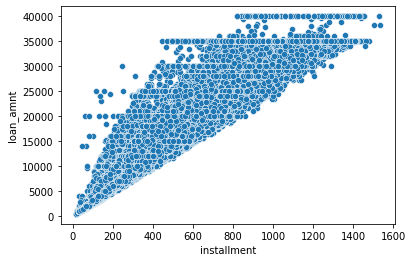

In [174]:
sns.scatterplot(df_org['installment'],df_org['loan_amnt'])

In [176]:
df_org['home_ownership'].value_counts().sort_values(ascending=False)

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


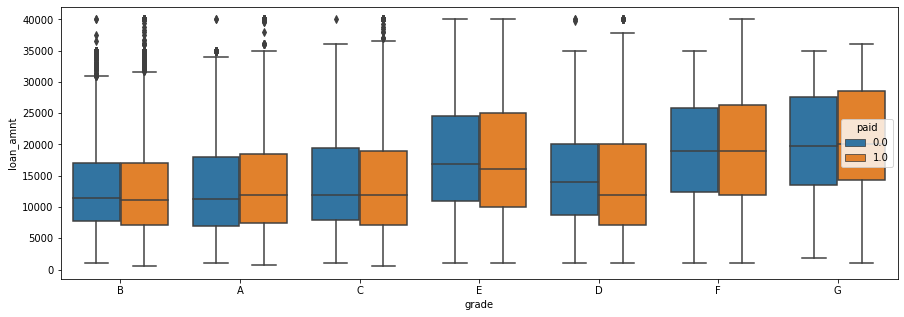

In [194]:
plt.figure(figsize=(15,5))
sns.boxplot(df_org['grade'],df_org['loan_amnt'],hue=df_org['paid'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


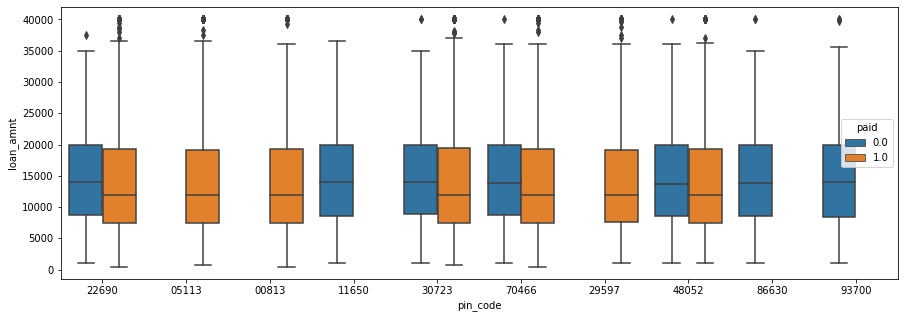

In [193]:
plt.figure(figsize=(15,5))
sns.boxplot(df_org['pin_code'],df_org['loan_amnt'],hue=df_org['paid'])

In [199]:
df_org.groupby('emp_title').sum()['paid'].sort_values(ascending=False)

emp_title
Teacher                        3532.0
Manager                        3321.0
Registered Nurse               1476.0
RN                             1467.0
Supervisor                     1425.0
                                ...  
Plastic Surgery Coordinator       0.0
Kohls dept stores                 0.0
CMOS Supervisor                   0.0
Kohls department store            0.0
Production  team leader           0.0
Name: paid, Length: 173105, dtype: float64

In [202]:
from sklearn.metrics import roc_curve,roc_auc_score

In [215]:
y_pred_prob_1[:,1]

array([0.91488377, 0.85176179, 0.85536979, ..., 0.92041127, 0.96726667,
       0.89971761])

In [224]:
fpr,tpr,thres=roc_curve(y_test_1.values,y_pred_prob_1[:,1])

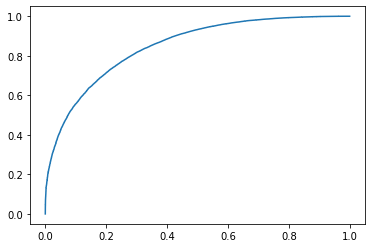

In [225]:
plt.plot(fpr,tpr)
plt.show()

In [226]:
roc_auc_score(y_test_1.values,y_pred_prob_1[:,1])

0.8474930130549172

In [221]:
thres

array([1.99999888e+000, 9.99998877e-001, 9.94256053e-001, ...,
       9.11095935e-003, 9.05522237e-003, 9.71871085e-105])